## Testing shannon entropy levels in measures with deçi-tâlas

I'm exploring ways to make search more efficient. Because talas are augmented inexactly, the ql values, particularly unstripped, are more... "odd." If we compute shannon entropy on measures with talas, how do these levels compare to measures/parts without talas. I'll try this on *Liturgie* first. For a cool visualization, will try and use matplotlib color maps. 

In [61]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import entropy
from music21 import chord
from music21 import converter
from music21 import note
from music21 import stream

In [2]:
l = [1, 2, 3]
print(entropy(l))

1.0114042647073518


In [14]:
liturgie = '/Users/lukepoeppel/Dropbox/Luke_Myke/Messiaen_Qt/Messiaen_I_Liturgie/Messiaen_I_Liturgie_de_cristal_CORRECTED.mxl'
c = converter.parse(liturgie)
for this_part in c.parts:
    print(this_part)

<music21.stream.Part Violin>
<music21.stream.Part Clarinet in Bb>
<music21.stream.Part Violoncello>
<music21.stream.PartStaff P4-Staff1>
<music21.stream.PartStaff P4-Staff2>


In [57]:
def measure_qls(part_num):
    all_ql = []
    for this_measure in c.parts[part_num].getElementsByClass(stream.Measure):
        this_measure_ql = []
        for this_note in this_measure.flat.notes: # filters all except notes and chord
            pre = this_note.quarterLength
            if type(pre) == Fraction:
                post = float(pre)
                this_measure_ql.append(post)
            else:
                this_measure_ql.append(pre)
        
        all_ql.append(this_measure_ql)
    
    return all_ql

print(measure_qls(3))

[[1.0], [1.0, 1.0, 0.5, 0.5], [0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.75], [0.75, 0.25, 0.5, 0.25, 0.25, 0.25, 0.75], [1.0, 2.0], [1.0, 1.0, 1.0], [0.5, 0.5, 0.25, 0.5, 0.25, 0.25, 0.5, 0.25], [0.25, 0.75, 0.75, 0.25, 0.5, 0.25, 0.25], [0.25, 0.75, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 0.5, 0.5, 0.25, 0.5, 0.25], [0.25, 0.5, 0.25, 0.25, 0.75, 0.75, 0.25], [0.5, 0.25, 0.25, 0.25, 0.75, 1.0], [2.0, 1.0], [1.0, 1.0, 0.5, 0.5], [0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.75], [0.75, 0.25, 0.5, 0.25, 0.25, 0.25, 0.75], [1.0, 2.0], [1.0, 1.0, 1.0], [0.5, 0.5, 0.25, 0.5, 0.25, 0.25, 0.5, 0.25], [0.25, 0.75, 0.75, 0.25, 0.5, 0.25, 0.25], [0.25, 0.75, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 0.5, 0.5, 0.25, 0.5, 0.25], [0.25, 0.5, 0.25, 0.25, 0.75, 0.75, 0.25], [0.5, 0.25, 0.25, 0.25, 0.75, 1.0], [2.0, 1.0], [1.0, 1.0, 0.5, 0.5], [0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.75], [0.75, 0.25, 0.5, 0.25, 0.25, 0.25, 0.75], [1.0, 2.0], [1.0, 1.0, 1.0], [0.5, 0.5, 0.25, 0.5, 0.25, 0.25, 0.5, 0.25], [0.25, 0.7

In [43]:
def measure_by_measure_entropy(part_num):
    qls = measure_qls(part_num)
    measure_entropy = []
    for this_measure in qls:
        measure_entropy.append(entropy(this_measure))
    
    return measure_entropy

print(measure_by_measure_entropy(1))

[1.791759469228055, 2.2450486785036894, 1.6094379124341005, 2.0434812826233633, 1.945910149055313, 1.9072839993213793, 1.7478680974667573, 2.1383330595080277, 1.0986122886681098, 2.2167680777633496, 1.5810937501718234, 2.0228085294147036, 2.668008697899352, 1.7524984573425937, 1.7328679513998633, 1.2141368187614339, 1.3321790402101223, 2.5126585295298014, 2.0228085294147036, 1.791759469228055, 1.549129075454959, 0.0, 1.3296613488547582, 0.639031859650177, 1.7351264569629226, 1.0397207708399179, 1.966175517149571, 1.9214422523876626, 2.576457673843677, 2.484906649788001, 2.484906649788001, 1.3579778549873243, 1.0114042647073518, 1.5498260458782016, 2.0228085294147036, 2.6499850656133153, 3.1780538303479453, 2.5070264355574188, 0.0, 1.7481554572476763, 1.9748615173394064, 0.0, 0.6931471805599453]


In [47]:
def average_part_entropy(part_num):
    all_entropy = measure_by_measure_entropy(part_num)
    return np.mean(all_entropy)

print(average_part_entropy(1))

1.7161657494027331


In [58]:
for i, this_part in enumerate(c.parts):
    print(this_part, average_part_entropy(i))

<music21.stream.Part Violin> 1.5792293691254369
<music21.stream.Part Clarinet in Bb> 1.7161657494027331
<music21.stream.Part Violoncello> 1.115127897014091
<music21.stream.PartStaff P4-Staff1> 1.4305286537225188
<music21.stream.PartStaff P4-Staff2> 1.4305286537225188


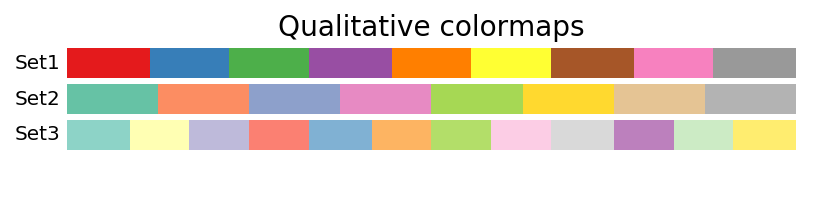

In [67]:
cmaps = [('Qualitative', [
            'Set1', 'Set2', 'Set3'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_map(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

### Instead of tracking part average by measure, could track by window of length equal to the average tala length (or, likely better, ql_duration) either in the dataset or in Messiaen own's use.